In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 04 2021
@author: Kamran Nejad-Sattary
"""

# load libraries
import pandas as pd
import numpy as np
from fredapi import Fred
import warnings
import yaml
import wrds
import itertools

# retrieve functions from utils
from utils import collect_financial_data, perform_training_validation

warnings.simplefilter('ignore')

DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'

with open(r'%sapi_key.yaml' %DATA_DIR) as file: 
    api_key = yaml.load(file)['api_key']
    
fred = Fred(api_key=api_key)

wrds_db=wrds.Connection(wrds_username='kamransattary')

Loading library list...
Done


In [2]:
# Define grid and collect financial data
macro_vars, financial_vars = ['GDPC1','EXPGSC1','IMPGSC1','UNRATE','GFDEBTN'], []

pca_options = ['PCA','NO PCA']
window_sizes = [6,8,12,16]
loss_functions = ['mean_squared_error', 'mean_absolute_error']
fill_methods = ['linear_interpolate','sarimax']
dropouts = [None, 0.2, 0.5]
n_layer_options = [1,2,3]
n_neurons_options = [25,50,75]

gs_hyperparams = list(itertools.product(*[pca_options, loss_functions, fill_methods, window_sizes, dropouts, n_layer_options, n_neurons_options]))

gs_vars = {'Financial':financial_vars, 
           'Macroeconomic':macro_vars}

collect_data = False 
if collect_data == True: collect_financial_data(DATA_DIR, wrds_db)
financial_data = pd.read_csv(DATA_DIR + "financial data.csv", index_col=False).set_index('index')
financial_vars.extend(financial_data.columns.tolist())
chosen_macro_indicators = {'GDPC1':'earliest_available', #GDP
                           'EXPGSC1':'earliest_available', #EXP G&S
                           'IMPGSC1':'earliest_available', #IMP G&S
                           'UNRATE':'earliest_available', #Unemployment 
                           'GFDEBTN':'earliest_available' #Federal Debt
                           }

print("%s Hyperparameter combinations determined" % len(gs_hyperparams))

864 Hyperparameter combinations determined


Presenting Results for: 0/864 Hyperparameter Combination
Variables Chosen: Financial
With PCA
Loss: mean_squared_error
Filling Method: linear_interpolate
Window Size: 6
Dropout: None
N Layers: 1
N neurons: 25
The data has 325 observations
1 components are necessary to explain > 90.0% of the image variation
Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0118 - val_loss: 9.9858e-05
Epoch 2/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.1582e-04 - val_loss: 1.7923e-04
Epoch 3/300
1000/1000 [==============================] - 1s 1ms/step - loss: 3.1108e-04 - val_loss: 8.8765e-05
Epoch 4/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.5383e-04 - val_loss: 1.1431e-04
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6378e-04 - val_loss: 8.7187e-05
Epoch 6/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6127e-04 - val_loss: 8.1234e-05
Epoch 7/300
1000/1000 [=======

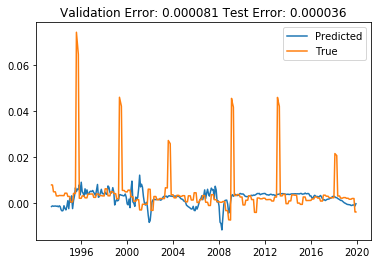

Presenting Results for: 1/864 Hyperparameter Combination
Variables Chosen: Financial
With PCA
Loss: mean_squared_error
Filling Method: linear_interpolate
Window Size: 6
Dropout: None
N Layers: 1
N neurons: 50
The data has 325 observations
1 components are necessary to explain > 90.0% of the image variation
Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2872e-04 - val_loss: 9.3045e-05
Epoch 2/300
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4691e-04 - val_loss: 9.5576e-05
Epoch 3/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0140e-04 - val_loss: 8.7761e-05
Epoch 4/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1435e-04 - val_loss: 8.3092e-05
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1005e-04 - val_loss: 8.7403e-05
Epoch 6/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5562e-04 - val_loss: 8.6714e-05


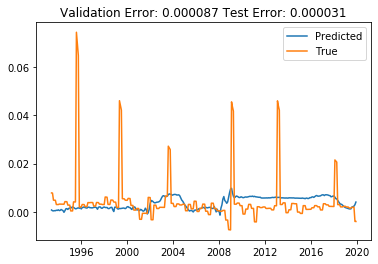

Presenting Results for: 2/864 Hyperparameter Combination
Variables Chosen: Financial
With PCA
Loss: mean_squared_error
Filling Method: linear_interpolate
Window Size: 6
Dropout: None
N Layers: 1
N neurons: 75


KeyboardInterrupt: 

In [3]:
# Iterate over Grid Search
gs_res = perform_training_validation(DATA_DIR, OUTPUT_DIR, gs_vars, gs_hyperparams, chosen_macro_indicators, fred, financial_data, flush=False)